<a href="https://colab.research.google.com/github/ElkinAleman/DataScients/blob/main/Kmean_para_An%C3%A1lisis_de_Robos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analis de datos

A continuación analizaremos la base de datos USArrests la cual contiene los registro de robo, aresto entre otros en varios estados de EE.UU

In [1]:
# Conectamos Driver para extraer la base de datos

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install funpymodeling

In [4]:
# Importamos las librerias a usar

# Manipulacipin de datos
import pandas as pd
import numpy as np
from funpymodeling import * # !pip install funpymodeling

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer # visualización de los clusters
import plotly.express as px # para gráfico 3D

# Modelado

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Advertencias

import warnings
warnings.filterwarnings('ignore')

# SEGMENTECIÓN PARA ANALIZAR LA BASE DE DATOS USArest

## Objetivo:
Encontrar grupos homogeneos que permita identificar como se distribuye la violencia en los diferentes estados de EE.UU. mediante el uso del algoritmo K-Means. Con este análisis se obtiene información de seguridad para cada uno de los estados.

## Metodología:

1. Exploración de datos
2. Determinación del número optimo de clúster mediante la libreria yellowbrick
3. Aplicación del algoritmo K-Mean
4. Análisis de  

In [6]:
ruta = '/content/drive/MyDrive/Data set/BD_Cluster/Arestos.csv'
df = pd.read_csv(ruta, sep = ',')


In [7]:
df.head()

,Estados,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Estados   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df = df.set_axis(['Estados', 'Asesinatos','Agresion','Pro_urbano','Violacion'],axis = 1) # Cambio de nombre de nombres de varible
df.head()

,Estados,Asesinatos,Agresion,Pro_urbano,Violacion
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
"""
Se veririfica con la función status la cantidad de valores faltantes, los valores
únicos y el tipo de variable.
"""
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Estados,0,0.0,0,0.0,50,object
1,Asesinatos,0,0.0,0,0.0,43,float64
2,Agresion,0,0.0,0,0.0,45,int64
3,Pro_urbano,0,0.0,0,0.0,36,int64
4,Violacion,0,0.0,0,0.0,48,float64


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Asesinatos,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Agresion,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Pro_urbano,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Violacion,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


# **Visualizaciones**

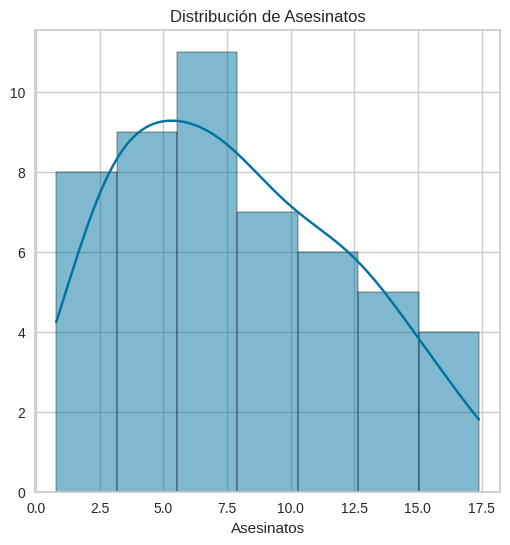

In [34]:
plt.figure(figsize=(6,6))
sns.histplot(x = 'Asesinatos', kde = True, data = df)
plt.title('Distribución de Asesinatos')
plt.xlabel('Asesinatos')
plt.ylabel('')
plt.show()

In [44]:
def graficar_histogramas(df, bins=int, figsize=(10, 5)):
    """
    Grafica histogramas de todas las variables numéricas de un DataFrame.

    Parámetros:
    df : pandas.DataFrame -> DataFrame con las variables a graficar.
    bins : int -> Número de divisiones del histograma (por defecto 30).
    figsize : tuple -> Tamaño de la figura (por defecto (10, 5)).
    """
    # Seleccionar solo las columnas numéricas
    df_numeric = df.select_dtypes(include=['number'])

    # Si no hay variables numéricas, mostrar mensaje
    if df_numeric.shape[1] == 0:
        print("No hay variables numéricas en el DataFrame.")
        return

    # Crear subgráficos con 2 columnas
    num_vars = df_numeric.shape[1]
    filas = (num_vars // 2) + (num_vars % 2)  # Calcular filas necesarias

    fig, axes = plt.subplots(filas, 2, figsize=(figsize[0], filas * figsize[1] / 2))
    axes = axes.flatten()  # Asegurar que los ejes sean unidimensionales

    for i, col in enumerate(df_numeric.columns):
        sns.histplot(df_numeric[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos si hay un número impar de variables
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


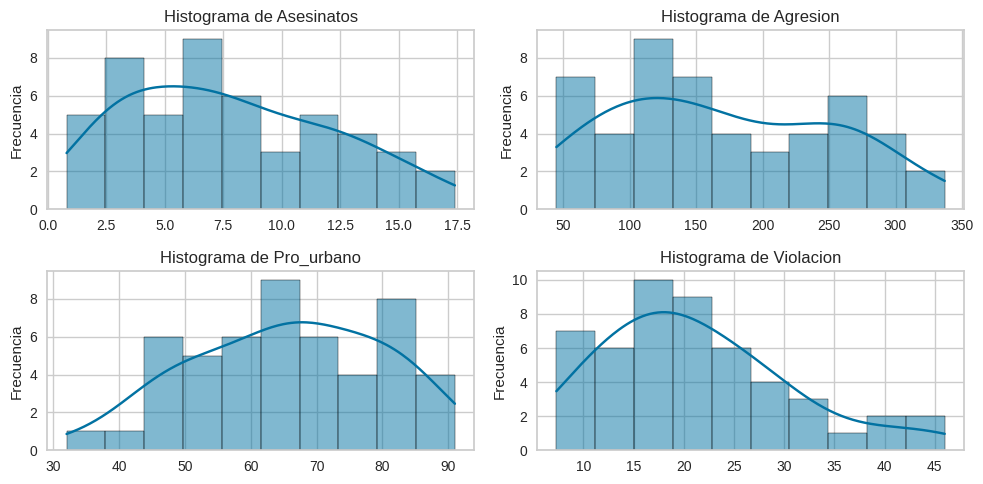

In [45]:
graficar_histogramas(df, bins=10)

In [86]:
# Traspoinemos la base de datos para hacer un gráfico de cajas para comparar las
# diferentes caracteristicas de la base de datos usando la función melt de pandas (pd.melt)
dfg = df[['Estados','Asesinatos','Agresion','Violacion']]
dfg = pd.melt(dfg, id_vars=['Estados'], var_name='Caracteristicas', value_name="Valor")
dfg.head()

,Estados,Caracteristicas,Valor
0,Alabama,Asesinatos,13.2
1,Alaska,Asesinatos,10.0
2,Arizona,Asesinatos,8.1
3,Arkansas,Asesinatos,8.8
4,California,Asesinatos,9.0


<Figure size 1100x500 with 0 Axes>

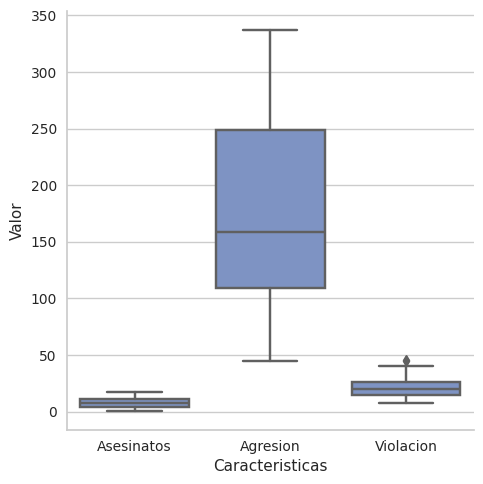

In [90]:
# Cambiar el tema y la paleta de colores
sns.set_style("whitegrid")  # Tema blanco con cuadrículas
#sns.set_palette("pastel")   # Colores suaves

# Crear el gráfico
plt.figure(figsize=(11,5))
sns.catplot(x='Caracteristicas', y='Valor', data=dfg, kind='box', color = '#728FCE')  # Definir tipo de gráfico

plt.show()

In [93]:
# !pip install pygwalker
import pygwalker as pyg
#pyg.walk(df)

<Figure size 600x600 with 0 Axes>

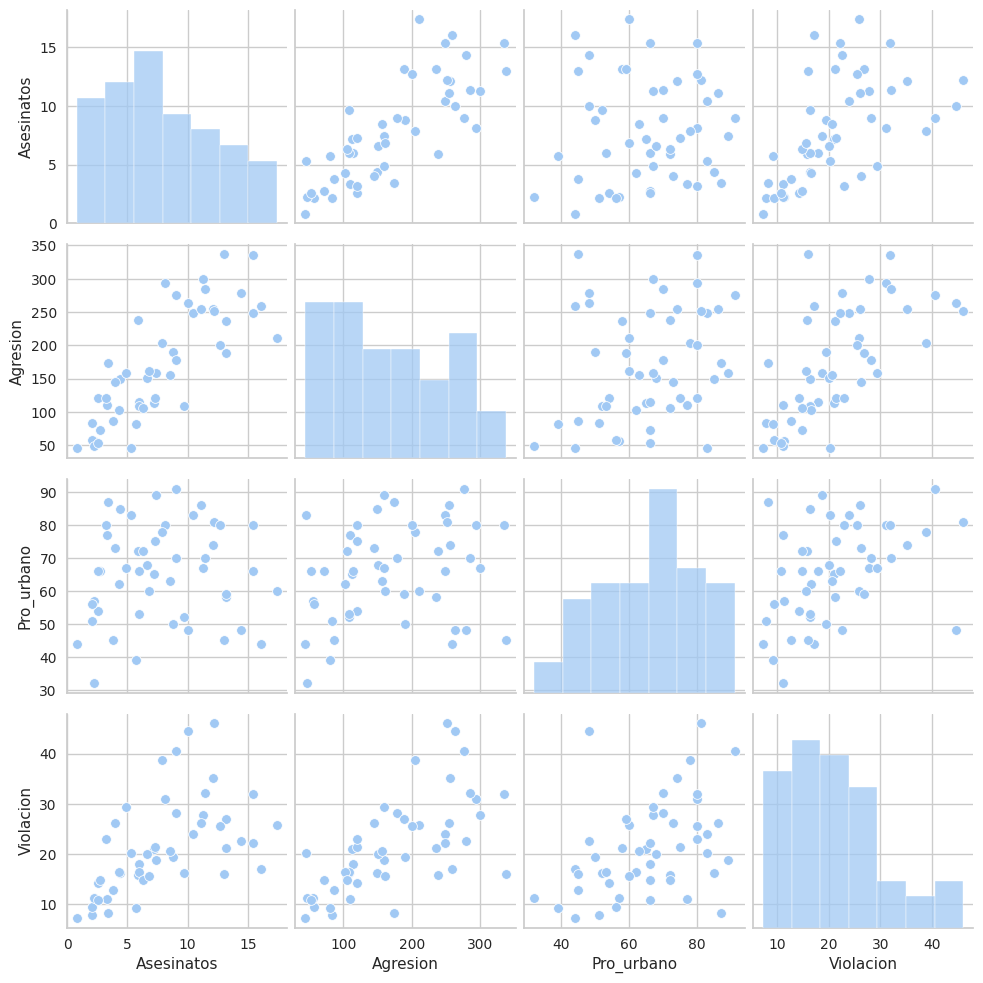

In [97]:
# Relacion entre las variables
plt.figure(figsize=(6,6))
sns.pairplot(df)
plt.show()

In [107]:
corr_matrix = df[['Asesinatos','Agresion','Violacion']].corr()
corr_matrix

,Asesinatos,Agresion,Violacion
Asesinatos,1.000000,0.801873,0.563579
Agresion,0.801873,1.000000,0.665241
Violacion,0.563579,0.665241,1.000000


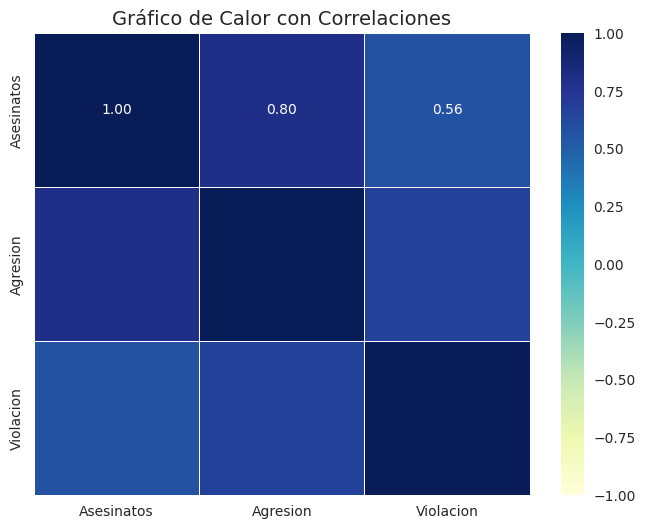

In [108]:
plt.figure(figsize=(8,6))  # Ajusta el tamaño del gráfico

sns.heatmap(corr_matrix,
            annot=True,       # Muestra los valores en las celdas
            fmt=".2f",        # Formato de los números (2 decimales)
            cmap='YlGnBu',    # Paleta de colores
            vmax=1, vmin=-1,  # Rango de valores
            linewidths=0.5,   # Grosor de líneas entre celdas
            annot_kws={"size": 10})  # Tamaño del texto de los valores

plt.title('Gráfico de Calor con Correlaciones', fontsize=14)
plt.show()

# **Estandarización de los datos**

Usaremos el algoritmo de K mean, para ello, es importante escalar los datos para asegurar que todos esten en una misma escala. Asi se evita que las variables con valores grandes domine sobre otros valores más pequeños.

In [8]:
standar = StandardScaler()
df_st = standar.fit_transform(df[['Asesinatos','Agresion','Violacion','Pro_urbano']])
pd.DataFrame(df_st, columns = ['Asesinatos','Agresion','Violacion','Pro_urbano']).head()


,Asesinatos,Agresion,Violacion,Pro_urbano
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


# **Seleccionamos el numero de clúster idoneos**

Para seleccionar el valor ideal de clúster, usamos la función KElbowVisualizer de la libreria *yellowbrick*. Como se muestra en la figura, el número de clústeres a seleccionar es de 4.

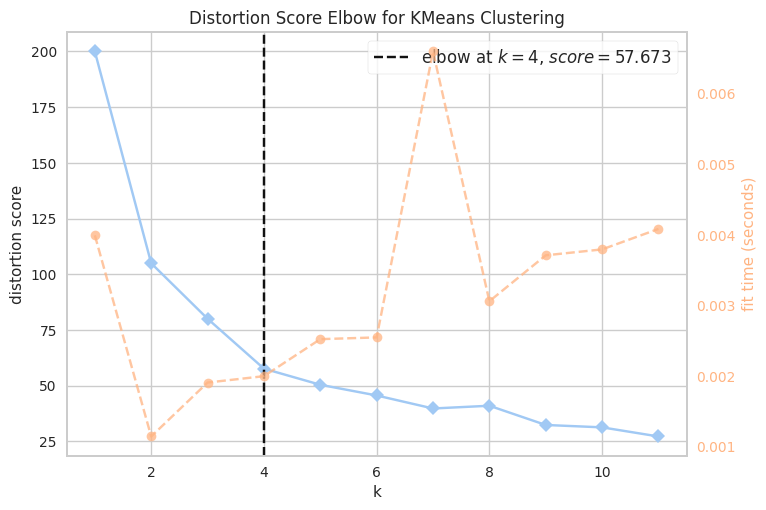

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [114]:
modelo = KMeans()
fig = KElbowVisualizer(modelo, k=(1,12))
fig.fit(df_st)
fig.show()

In [115]:
wcs = []
for i in range(1, 12):
  modelo = KMeans(n_clusters=i, random_state=99)
  modelo.fit(df_st)
  wcs.append(modelo.inertia_)
  print(f'WCSS para {i} clústeres: {modelo.inertia_}')

WCSS para 1 clústeres: 200.0
WCSS para 2 clústeres: 104.96163315756873
WCSS para 3 clústeres: 80.18851631161148
WCSS para 4 clústeres: 58.12889839018575
WCSS para 5 clústeres: 50.967459051021436
WCSS para 6 clústeres: 45.59204161261911
WCSS para 7 clústeres: 41.17481728309239
WCSS para 8 clústeres: 38.08656332328906
WCSS para 9 clústeres: 34.56224438678012
WCSS para 10 clústeres: 30.082496683536878
WCSS para 11 clústeres: 28.440642147198805


# Ejecutamos el modelo K-mean con un número de clúster = 4

In [9]:
modelo = KMeans(n_clusters=4, init='k-means++', random_state=99)
modelo.fit(df_st)

# agregamos los clúster a la data original
df['Grupo'] = modelo.labels_
df.head()

,Estados,Asesinatos,Agresion,Pro_urbano,Violacion,Grupo
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [10]:
mean_g = df.groupby('Grupo')[['Asesinatos','Agresion','Pro_urbano','Violacion']].mean().T
mean_g

Grupo,0,1,2,3
Asesinatos,3.01,10.815385,5.642105,13.9375
Agresion,73.80,257.384615,131.842105,243.6250
Pro_urbano,49.70,76.000000,71.684211,53.7500
Violacion,11.06,33.192308,18.326316,21.4125


In [132]:
new_df = df[['Grupo','Asesinatos','Agresion','Violacion']]
new_df.head()
# Crear gráfico interactivo en 3D
fig = px.scatter_3d(new_df,
                    x='Asesinatos',
                    y='Agresion',
                    z='Violacion',
                    color=new_df['Grupo'].astype(str),  # Convertir cluster a string para colores
                    title="Clusters en 3D de K-Means",
                    labels={'Grupo': 'Cluster'},
                    opacity=0.8)

fig.update_traces(marker=dict(size=6))  # Ajustar tamaño de los puntos
fig.show()

In [12]:
# Mostrar los grupos y calcular la contribución en ventas de cada grupo
analisis_ = df.groupby('Grupo').agg(
    Asesinatos=('Asesinatos', 'mean'),
    Agresion=('Agresion', 'mean'),
    Violacion=('Violacion', 'mean'),
    pro_Urban =('Pro_urbano', 'mean')
).reset_index()
#analisis_[['Asesinatos','Agresion','Violacion']] = (analisis_[['Asesinatos','Agresion','Violacion']]/1000).round(2)
print("Promedios de grupo:")
analisis_

Promedios de grupo:


,Grupo,Asesinatos,Agresion,Violacion,pro_Urban
0,0,3.010000,73.800000,11.060000,49.700000
1,1,10.815385,257.384615,33.192308,76.000000
2,2,5.642105,131.842105,18.326316,71.684211
3,3,13.937500,243.625000,21.412500,53.750000


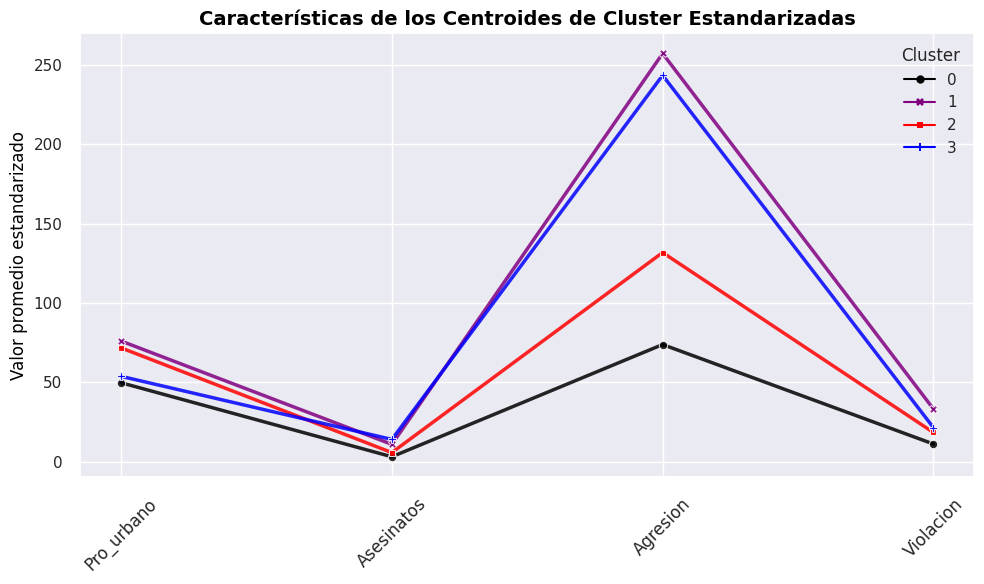

Grupo,0,1,2,3
Pro_urbano,49.70,76.000000,71.684211,53.7500
Asesinatos,3.01,10.815385,5.642105,13.9375
Agresion,73.80,257.384615,131.842105,243.6250
Violacion,11.06,33.192308,18.326316,21.4125


In [13]:
# Generamos el gráfico de líneas con Seaborn
mean_g = df.groupby('Grupo')[['Pro_urbano','Asesinatos','Agresion','Violacion']].mean().T

sns.set_theme(style="darkgrid")
custom_palette = ["black", "purple", "red", "blue"]
plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(
    data=mean_g,
    dashes=False,
    markers=True,
    linewidth=2.5,
    palette=custom_palette,
    alpha=0.85
)
plt.xticks(rotation=45, fontsize=12)
plt.title('Características de los Centroides de Cluster Estandarizadas', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Valor promedio estandarizado', fontsize=12, color='black')
plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()
mean_g

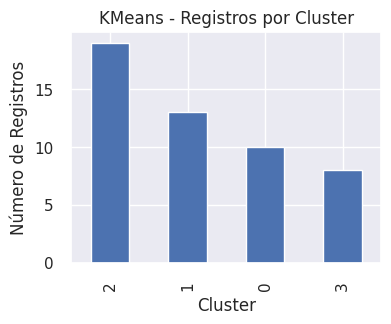

In [17]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
pd.value_counts(df['Grupo']).plot(kind='bar').set_title('KMeans - Registros por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.show()

In [16]:
grupo1 =df[df.Grupo==0]
grupo1.head()


,Estados,Asesinatos,Agresion,Pro_urbano,Violacion,Grupo
11,Idaho,2.6,120,54,14.2,0
14,Iowa,2.2,56,57,11.3,0
18,Maine,2.1,83,51,7.8,0
25,Montana,6.0,109,53,16.4,0
28,New Hampshire,2.1,57,56,9.5,0
